In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Wharton Acads/Python/Eurodollar/Data.csv', parse_dates=True)
data.head()
df=data
df.drop(['Equity','Bond','Dollar'],axis=1,inplace=True)
df.head()

,Date,Equity Return,Bond Return,Dollar Return
0,03-2-2023,-1.04,0.00,1.15
1,02-2-2023,1.47,0.02,0.53
2,01-2-2023,1.05,1.06,-0.87
3,31-1-2023,1.47,0.19,-0.18
4,30-1-2023,-1.30,-0.26,0.35


In [ ]:
df.tail()

,Date,Equity Return,Bond Return,Dollar Return
10629,09-12-1980,-0.10,-1.31,0.75
10630,08-12-1980,-2.56,0.03,-0.19
10631,05-12-1980,-1.80,0.42,0.67
10632,04-12-1980,-0.17,0.11,-0.08
10633,03-12-1980,NaN,NaN,NaN


In [ ]:
df.dropna(inplace=True)
df.tail()

,Date,Equity Return,Bond Return,Dollar Return
10628,10-12-1980,-1.71,-0.25,0.86
10629,09-12-1980,-0.10,-1.31,0.75
10630,08-12-1980,-2.56,0.03,-0.19
10631,05-12-1980,-1.80,0.42,0.67
10632,04-12-1980,-0.17,0.11,-0.08


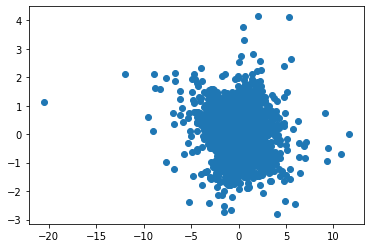

In [ ]:
plt.scatter(df['Equity Return'],df['Bond Return'],cmap=df['Dollar Return'])

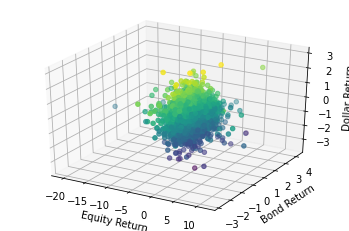

In [ ]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(df['Equity Return'], df['Bond Return'], df['Dollar Return'], c=df['Dollar Return'], cmap='viridis')
ax.set_xlabel('Equity Return')
ax.set_ylabel('Bond Return')
ax.set_zlabel('Dollar Return')
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='Equity Return', y='Bond Return', z='Dollar Return', color='Dollar Return', color_continuous_scale='viridis')
fig.show()


In [ ]:
from sklearn.cluster import KMeans
X = df[["Equity Return", "Bond Return", "Dollar Return"]].values
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_


In [ ]:
X

array([[-1.04,  0.  ,  1.15],
       [ 1.47,  0.02,  0.53],
       [ 1.05,  1.06, -0.87],
       ...,
       [-2.56,  0.03, -0.19],
       [-1.8 ,  0.42,  0.67],
       [-0.17,  0.11, -0.08]])

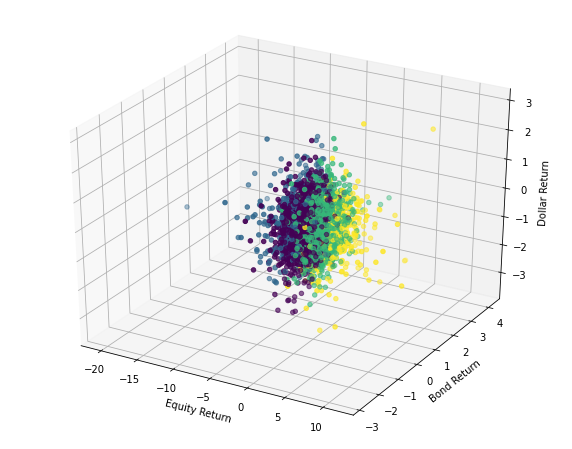

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plot the results in 3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels)
ax.set_xlabel("Equity Return")
ax.set_ylabel("Bond Return")
ax.set_zlabel("Dollar Return")

plt.show()


In [ ]:
import plotly.express as px

fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], color=labels,color_continuous_scale='viridis')
ax.set_xlabel("Equity Return")
ax.set_ylabel("Bond Return")
ax.set_zlabel("Dollar Return")
fig.show()


In [ ]:
df['cluster'] = labels


In [ ]:
df.head(50)

,Date,Equity Return,Bond Return,Dollar Return,cluster
0,03-2-2023,-1.04,0.00,1.15,0
1,02-2-2023,1.47,0.02,0.53,3
2,01-2-2023,1.05,1.06,-0.87,2
3,31-1-2023,1.47,0.19,-0.18,3
4,30-1-2023,-1.30,-0.26,0.35,0
5,27-1-2023,0.25,-0.19,0.09,2
6,26-1-2023,1.11,-0.23,0.20,2
7,25-1-2023,-0.02,0.06,-0.28,2
8,24-1-2023,-0.08,0.46,-0.22,2
9,23-1-2023,1.19,-0.30,0.13,2
